原型大海哥文章，数据UCI鲍鱼数据，直径和壳重

In [1]:
import csv
from torch import nn, tensor, cat, split, randperm, no_grad,save,load    
from torch.optim import NAdam
import matplotlib.pyplot as plt

cat函数

In [2]:
#1.数据集预处理
x_dataset,y_dataset=[],[]
with open('D:/Rachel/abalone/abalone.data',newline='') as file:
    dataset = csv.reader(file,delimiter=',')
    for row in dataset:
        x_dataset.append(float(row[2]))
        y_dataset.append(float(row[-2]))
           
x=tensor(x_dataset).view(-1,1)
y=tensor(y_dataset).view(-1,1)

# 拼接
tensor_dataset=cat([x,y],dim=1)

idx = randperm(tensor_dataset.size(0))#打乱第一维的下标
tensor_dataset = tensor_dataset[idx,:]#打乱张量第一维的顺序


#划分数据集
train_dataset=tensor_dataset[:int(len(tensor_dataset)*0.6)]
valid_dataset=tensor_dataset[int(len(tensor_dataset)*0.6):int(len(tensor_dataset)*0.8)]
test_dataset=tensor_dataset[int(len(tensor_dataset)*0.8):]

train_x,train_y=split(train_dataset,[1,1],dim=1)
valid_x,valid_y=split(valid_dataset,[1,1],dim=1)
test_x,test_y=split(test_dataset,[1,1],dim=1)

简单四层神经网络

In [3]:
#2.定义神经网络模型
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        input_layer=1
        hidden_layer=10
        output_layer = 1
        
        self.linear1 = nn.Linear(input_layer, hidden_layer)
        self.norm1 = nn.BatchNorm1d(hidden_layer)
        self.sigmoid = nn.Sigmoid()
        self.linear2 = nn.Linear(hidden_layer,output_layer)
           
    def forward(self,x):
        out = self.linear1(x)
        out = self.norm1(out)
        out = self.sigmoid(out)
        out = self.linear2(out)
           
        return out    

In [4]:
#3.模型、优化器、loss实例化
net=Net()
optimizer=NAdam(net.parameters(),lr=0.001,momentum_decay=1e-4,weight_decay=1e-5)
loss_fn=nn.MSELoss()

In [5]:
#4.循环，进行梯度下降，更新参数          
epoch_list=[]          
train_loss_list=[]          
valid_loss_list=[]          

for i in range(1,5001):
    train_y_predict=net(train_x)
    train_loss=loss_fn(train_y_predict,train_y)
           
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    if i%100==0:
        params=list(net.parameters())
        print(f'loss={train_loss} w={params[0].tolist()} b={params[1].tolist()}')#或.data
        epoch_list.append(i)#+ 1
        train_loss_list.append(train_loss.item())
        with no_grad():
            valid_y_predict = net(valid_x)
            valid_loss = loss_fn(valid_y_predict, valid_y)
            valid_loss_list.append(valid_loss.item())

loss=0.06866689771413803 w=[[0.5756516456604004], [-0.7784181833267212], [0.8980334997177124], [-0.7721962332725525], [-0.2596893608570099], [0.727142870426178], [0.7938699722290039], [-0.915291428565979], [0.5977104306221008], [0.232340469956398]] b=[-0.4049222469329834, -0.2832286059856415, 0.5884016156196594, 0.08839612454175949, 0.07152281701564789, 0.3791923224925995, 0.737255871295929, -0.43682852387428284, -0.795807421207428, 0.007971735671162605]
loss=0.0063427709974348545 w=[[0.5751451253890991], [-0.6709279417991638], [0.7768262028694153], [-0.7205266356468201], [-0.032229989767074585], [0.6643223762512207], [0.7267403602600098], [-0.7828989624977112], [0.6303460597991943], [0.246833935379982]] b=[-0.32017645239830017, -0.2047271728515625, 0.4995635449886322, 0.03504074737429619, 0.02662571147084236, 0.29800882935523987, 0.6459054350852966, -0.3516102731227875, -0.7041482329368591, -0.00023573832004331052]
loss=0.003677070140838623 w=[[0.480137437582016], [-0.6008992195129395

loss=0.0033919017296284437 w=[[0.2384861260652542], [-3.332279447931796e-05], [0.08628249168395996], [-0.05277638137340546], [-5.680118556483649e-05], [3.355839726282284e-05], [0.21943196654319763], [-0.05776273459196091], [-0.0001488076086388901], [0.1956300288438797]] b=[-2.5018391625053482e-06, -4.5676752051804215e-05, 0.0025491188280284405, 0.00013616505020763725, 0.00012975739082321525, 1.9412735127843916e-05, 0.012406996451318264, -0.00011532448843354359, -0.020315388217568398, 6.656109690084122e-07]
loss=0.0033755223266780376 w=[[0.24323774874210358], [-0.00012783551937900484], [0.091944620013237], [-0.04839000478386879], [-0.00013630119792651385], [0.00014042164548300207], [0.22117072343826294], [-0.0538710318505764], [-0.00020935176871716976], [0.19321496784687042]] b=[2.4287888663820922e-05, 5.930887709837407e-05, 0.0019376507261767983, 1.6136538761202246e-05, 0.0003379093832336366, 1.085205985873472e-05, 0.008261636830866337, 1.477399837312987e-05, -0.014124181121587753, -5.

loss=0.0030152350664138794 w=[[0.2681857943534851], [0.00026313087437301874], [0.14875781536102295], [-0.009633444249629974], [9.360607509734109e-05], [-0.00035843305522575974], [0.22090856730937958], [-0.017817268148064613], [-5.9215766668785363e-05], [0.14551495015621185]] b=[-0.00019057611643802375, -8.063154382398352e-05, 0.00024160272732842714, -0.00017734254652168602, 0.00010302552254870534, 1.6359381334041245e-06, -5.636572677758522e-05, -7.536626799264923e-05, -0.0001242921280208975, 8.057117520365864e-05]
loss=0.0029869498685002327 w=[[0.2652040719985962], [0.0004993358161300421], [0.1456225961446762], [-0.008268563076853752], [0.0002522161230444908], [-0.0006358195678330958], [0.21688473224639893], [-0.016094259917736053], [4.141173849347979e-05], [0.13716651499271393]] b=[1.2348402378847823e-05, -2.4563083570683375e-05, 0.000182205272722058, -0.00013469714031089097, 0.0004403954080771655, -2.61589575529797e-05, 3.665716576506384e-05, 0.00047814109711907804, 6.117764132795855

loss=0.0026835023891180754 w=[[0.2309945672750473], [0.003116040490567684], [0.049996115267276764], [-0.005065771285444498], [0.001689229509793222], [-0.0028886457439512014], [0.16777324676513672], [-0.007910831831395626], [0.0011421993840485811], [0.04714655131101608]] b=[-0.00020204384054522961, -5.840673838974908e-05, 0.0005817099008709192, -0.00028913351707160473, 0.00024293447495438159, 6.576412124559283e-05, 0.00015991357213351876, -0.00014227732026483864, 7.650468614883721e-05, 0.00028827539063058794]


In [20]:
#保存模型和优化器          
model_path='C:/Users/86185/Mchandeler/model.pkl'          
optimizer_path='C:/Users/86185/Mchandeler/optimizer.pkl'        
save(net.state_dict(),model_path)          
save(optimizer.state_dict(),optimizer_path)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\86185\\Mchandeler\\output\\验证集的result.png'

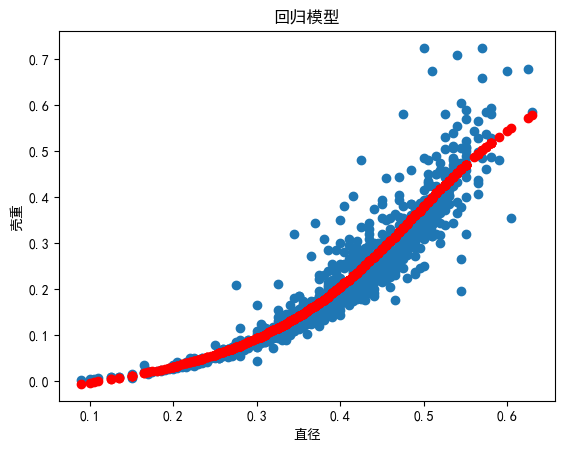

In [21]:
#5.模型评估          
plt.rcParams['font.sans-serif']=['SimHei']#黑体，显示中文          
plt.rcParams['axes.unicode_minus'] = False#运行配置参数总的轴（axes）正常显示正负号          
plt.title('回归模型')          
plt.xlabel('直径')          
plt.ylabel('壳重')                 
plt.scatter(valid_x.numpy().reshape(-1),valid_y.numpy().reshape(-1))          
plt.scatter(valid_x.numpy().reshape(-1),valid_y_predict.detach().numpy().reshape(-1),c='r')#plot          
plt.savefig('output/验证集的result.png')          
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\86185\\Mchandeler\\output\\train_loss.png'

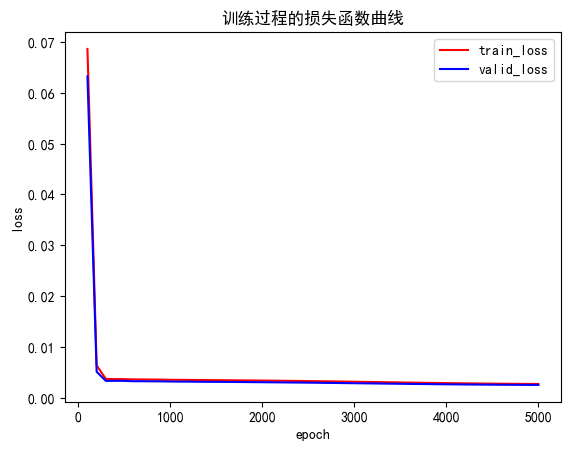

In [22]:
plt.title('训练过程的损失函数曲线')          
plt.xlabel('epoch')          
plt.ylabel('loss')          
plt.plot(epoch_list,train_loss_list,c='r',label='train_loss')          
plt.plot(epoch_list,valid_loss_list,c='b',label='valid_loss')          
plt.legend()          
plt.savefig('output/train_loss.png')          
plt.show()

学习结果

In [23]:
with no_grad():
    test_y_predict = net(test_x)
    test_loss = loss_fn(test_y_predict, test_y)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\86185\\Mchandeler\\output\\测试集的result.png'

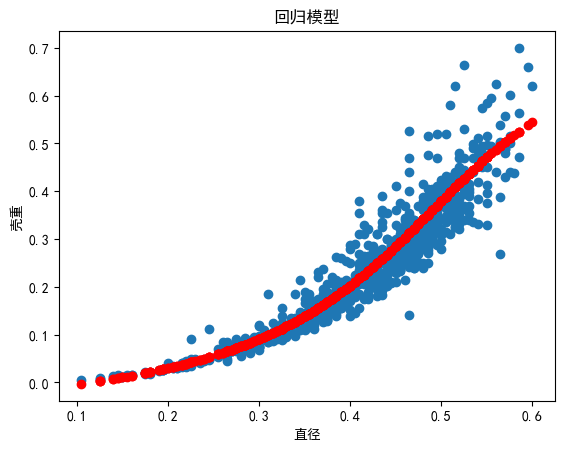

In [24]:
plt.title('回归模型')
plt.xlabel('直径')
plt.ylabel('壳重')
plt.scatter(test_x.numpy().reshape(-1),test_y.numpy().reshape(-1))    
plt.scatter(test_x.numpy().reshape(-1),test_y_predict.detach().numpy().reshape(-1),c='r')#或plot
plt.savefig('output/测试集的result.png')
plt.show()

In [26]:
print(f'最终损失对比：训练集={train_loss}，验证集={valid_loss}，测试集={test_loss}')

最终损失对比：训练集=0.0026835023891180754，验证集=0.0024979824665933847，测试集=0.001961411675438285
